<a href="https://colab.research.google.com/github/JIMINlx/BU-7300-Data-Analytics-and-Programming/blob/main/7300_Cluster_analysis_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Cluster analysis

K-means with numpy

K-means with sklearn

GMM with numpy

GMM with sklearn

#### 1 data exploration

We would be using the iris dataset from sklearn library itself. This dataset consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal/sepal length/width, stored in a 150x4 numpy.ndarray. The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width. In our exercise, we would be using only sepal_length and sepal_width for visualization simplicity.

In [ ]:

# read in the data from sklearn datasets
# we will use the iris dataset, this is just another way of reading data as opposed to reading from a csv file (you would need panads for that)

from sklearn import datasets
# from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt

import time


# import iris data
iris = datasets.load_iris()
print(iris.keys())
print(iris.feature_names)

# this pandas dataframe is created from the sklearn dataset instead of a csv file
# the original features from the dataset are used as column names, but we choose not to use them, because they contain 'cm'
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)

# so we added our own column names
iris_data = pd.DataFrame(iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])

# we are not using the target as we are dealing with k-means clustering, which is an unsupervised learning algorithm
y = iris.target
print(y)
iris_data["target"] = y
iris_data = iris_data[iris_data.target != 2] #we only use two types of irises in our exercise

data = iris_data[['sepal_length','sepal_width']] #we only use two features in our exercise for visualization purposes

print(data.head())
data = data.values

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
   sepal_length  sepal_width
0           5.1          3.5
1           4.9          3.0
2           4.7          3.2
3           4.6          3.1
4           5.0          3.6


In [ ]:
#To generate data from two Gaussian distributions with different means and covariance matrices and store it in a pandas DataFrame called "data", you can use the `numpy` library to generate random samples from the Gaussian distributions and then create the DataFrame using `pandas`. Here's the code:

#python

import numpy as np

# Set the random seed for reproducibility
np.random.seed(0)

# Define the means and covariance matrices for the two Gaussian distributions
mean1 = [2, 2]
cov1 = [[1, 0], [0, 1]]

mean2 = [-2, -2]
cov2 = [[2, 0], [0, 2]]

# Generate random samples from the two Gaussian distributions
samples1 = np.random.multivariate_normal(mean1, cov1, 1000)
samples2 = np.random.multivariate_normal(mean2, cov2, 1000)

# Combine the samples from both distributions, since we are dealing with unsupervised learning, we do not have any labels
data = np.concatenate((samples1, samples2))

# Create the pandas DataFrame
iris_data = pd.DataFrame(data, columns=['x', 'y'])
# change the column names to 'sepal_length','sepal_width'
iris_data.columns = ['sepal_length','sepal_width']

# Display the first few rows of the DataFrame
print(iris_data.head())

# set iris_data's value to data
data = iris_data.values

#This code will generate 100 samples from each Gaussian distribution and combine them into a single DataFrame called "data" with two columns 'x' and 'y'.

   sepal_length  sepal_width
0      3.764052     2.400157
1      2.978738     4.240893
2      3.867558     1.022722
3      2.950088     1.848643
4      1.896781     2.410599


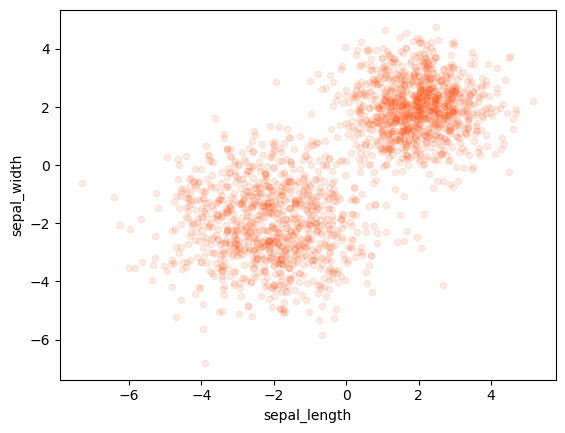

In [ ]:
# plotting the data points
# we will use the different colors for different clusters

def plotting(data, centroids=None, clusters=None):
    # this function will later on be used for plotting the clusters and centroids.
    # But now we use it to just make a scatter plot of the data
    # Input: the data as an array, cluster means (centroids), cluster assignemnts in {0,1,...,k-1}
    # Output: a scatter plot of the data in the clusters with cluster means
    plt.xlabel("sepal_length")
    plt.ylabel("sepal_width")

    alp = 0.1  # data alpha
    dt_sz = 20  # data point size
    cent_sz = 130  # centroid sz

    if centroids is None and clusters is None:
        # no centroids and no clusters, so all data are plotted in the same color
        plt.scatter(data[:, 0], data[:, 1], s=dt_sz, alpha=alp, c=cmpd[0])
    if centroids is not None and clusters is None:
        plt.scatter(data[:, 0], data[:, 1], s=dt_sz, alpha=alp, c=cmpd[0])
        plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=cent_sz, cmap=cmpcent)
    if centroids is not None and clusters is not None:
        plt.scatter(data[:, 0], data[:, 1], c=[cmpd[i] for i in clusters], s=dt_sz, alpha=alp)
        plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", cmap=cmpcent, s=cent_sz)
    if centroids is None and clusters is not None:
        plt.scatter(data[:, 0], data[:, 1], c=[cmpd[i] for i in clusters], s=dt_sz, alpha=alp)

    plt.show()

# plot the data
cmpd = ['orangered', '#20b2aa', '#ff7373'] # Choosing colors for plot
cmpcent = ['red', 'darkblue', 'limegreen']
plotting(data)

#### 2 K-means without scikit-learn function

We would contruct the K-means model with four steps.

Step 1 - Initialize cluster means by randomly choosing points between the minimum and maximum values of the data.

In [ ]:
import numpy as np
def init_centroids(data, k, random_seed=1):
    # INPUT: N x d data array, k number of clusters.
    # OUTPUT: k x d array of k randomly assigned mean vectors with d dimensions.

    # Random seed will generate exactly same "random" values for each execution.
    np.random.seed(seed=random_seed)

    # Initialize the centroids to be k random vectors, where each dimension is between the minimum and maximum value of the data.
    centroids = np.zeros((k, data.shape[1]))
    for i in range(data.shape[1]):
        centroids[:, i] = np.random.uniform(np.min(data[:, i]),
                                            np.max(data[:, i]),
                                            size=k)
    return centroids

step 2: assign each data point to the cluster with the nearest cluster mean.
The distance between a data point and a cluster mean is measured by Euclidean distance $\| \mathbf{x}^{(i)} - \mathbf{m}^{(c)} \|$.

In [ ]:

def assign_points(data, centroids):

    print(centroids)

    # INPUT: N x d data array, k x d centroids array.
    # OUTPUT: N x 1 array of cluster assignments in {0,...,k-1}.

    # -------------------------
    # method 1: loop through each data point and calculate the distance to each centroid
    # -------------------------

    # start timer
    start = time.time()

    c_assign_1 = np.zeros(data.shape[0], dtype=np.int16)
    for i in range(data.shape[0]):
        distance = [np.linalg.norm(data[i] - centroids[j]) for j in range(centroids.shape[0])]
        c_assign_1[i] = np.argmin(distance)

    print(time.time() - start)


    # -------------------------
    # method 2: vectorized calculation of the distance matrix
    # -------------------------
    start = time.time()

    c_assign_2 = np.zeros(data.shape[0], dtype=np.int16)
    distance = np.zeros((data.shape[0], centroids.shape[0]))
    print(distance.shape)

    # note that i is looping through number of centroids
    for i in range(centroids.shape[0]):
        #d = np.repeat(centroids[i].reshape(1,-1),data.shape[0], axis=0) - data
        d = centroids[i].reshape(1,-1).repeat(data.shape[0], axis=0) - data
        distance[:,i] = np.diag(d @ d.T)
    c_assign_2 = np.argmin(distance, axis=1)

    print(time.time() - start)

    #check if the two methods give the same results
    print(np.allclose(c_assign_1, c_assign_2))

    return c_assign_2


step 3: update the cluster means of the data points that were assigned to cluster c during the previous step.

In [ ]:
def move_centroids(data, old_centroids, c_assign):
    # INPUT:  N x d data array, k x d centroids array, N x 1 array of cluster assignments
    # OUTPUT: k x d array of relocated centroids
    # NOTE: if there're no points assigned to a cluster, keep its centroid unchanged

    # -------------------------
    # method 1: loop through each cluster and calculate the mean of all points assigned to that cluster
    # -------------------------

    start = time.time()

    new_centroids = np.zeros(old_centroids.shape)
    for i in range(len(old_centroids)):
        # get all points that belong to cluster i
        cluster_points = np.array([data[j] for j in range(len(data)) if c_assign[j] == i])

        if len(cluster_points) != 0:
            new_centroids[i] = np.mean(cluster_points, axis=0)
        else:
            new_centroids[i] = old_centroids[i]

    print(time.time() - start)
    # -------------------------
    # method 2: vectorized calculation of the mean of all points assigned to each cluster
    # -------------------------

    start = time.time()
    new_centroids_1 = np.zeros(old_centroids.shape)
    for i in range(len(old_centroids)):
        d= data[c_assign == i]
        new_centroids_1[i] = np.mean(d, axis=0)

    print(time.time() - start)

    print('the two methods are same? ', np.allclose(new_centroids, new_centroids_1))
    return new_centroids

step 4: loop where you repeat steps 2 and 3 until the stopping criterion is fulfilled.
Here we are using as stopping criterion a fixed number of iterations.

You can click the two buttons interactively to visualize the clustering results of each iteration.

Button(button_style='success', description='assign points', style=ButtonStyle())

Button(button_style='success', description='move centroids', style=ButtonStyle())

0.005359172821044922
0.0003769397735595703
the two methods are same?  True


/var/folders/kp/jjlfd3c92vx44vbf4kz6t_br0000gn/T/ipykernel_48157/1305553703.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", cmap=cmpcent, s=cent_sz)


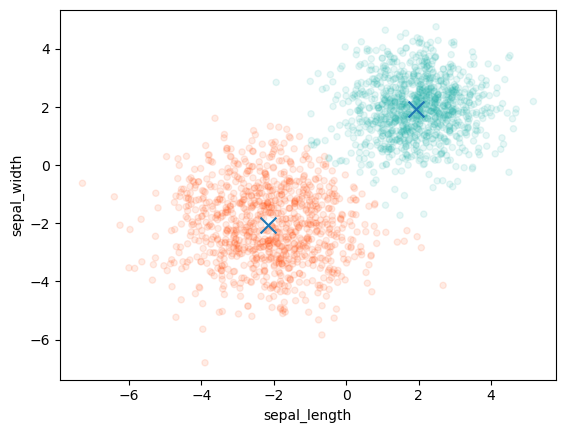

In [ ]:
from IPython.display import display
from ipywidgets import widgets
import ipywidgets
from IPython.display import clear_output

button1 = widgets.Button(description="assign points",button_style='success');display(button1)
button2 = widgets.Button(description="move centroids",button_style='success');display(button2)

def graph_refresh():
    clear_output(True)
    display(button1)
    display(button2)

def button1_clicked(p1):
    graph_refresh()
    global clusters
    clusters = assign_points(data, centroids)
    plotting(data, centroids, clusters)

def button2_clicked(p2):
    graph_refresh()
    global centroids
    centroids = move_centroids(data, centroids, clusters)
    plotting(data, centroids, clusters)

centroids = init_centroids(data, 3, random_seed=1) #initialize centroids
plotting(data, centroids=centroids, clusters=None) # plot data points with initial centroids mared with crosses


button1.on_click(button1_clicked)
button2.on_click(button2_clicked)

In [ ]:
# print out k-means final centroids
print("The final cluster mean values are:", centroids)

#### 3 K-means with scikit-learn function

In [ ]:
from sklearn.cluster import KMeans # import k-means algorithm from sklearn library
import numpy as np
kmeans = KMeans(n_clusters=2).fit(data) # create a k-means object and fit on the data
print('The final cluster mean values are: ',kmeans.cluster_centers_)

#create label vectors for data points for plotting purposes
y_pred = kmeans.predict(data)
c_assign = np.zeros(data.shape[0], dtype=np.int32)
for i in range(data.shape[0]):
    if y_pred[i] == 1: c_assign[i] = 1

plotting(data, kmeans.cluster_centers_, c_assign)

#### 4 GMM without scikit-learn function

We would build the GMM model with four steps.

Step 1: Initialize the cluster parameters. For each cluster, we initialize its mean randomly, and initialize its covariance matrix as a identity matrix.

In [ ]:
np.identity(5)

In [ ]:
def initialize_parameters(data, k, random_seed=1):
    np.random.seed(seed=random_seed)

    means = np.zeros((k, data.shape[1]))
    for i in range(data.shape[1]):
        means[:, i] = np.random.uniform(np.min(data[:, i]),
                                        np.max(data[:, i]),
                                        size=(k))
    covariances = np.zeros((k, data.shape[1], data.shape[1]))

    for f in range(k):
        covariances[f] = np.identity(data.shape[1])
    coefficients = np.ones(k) * (1/k)
    return means, covariances, coefficients

Step 2: Assign a probability for each datapoint belonging to each cluster ("membership weight"):
$$P(\mathbf{z}^{i};\mathbf{x}^{i},\theta) = \frac{\alpha_{z_{i}} \mathbf{\mathcal{N}}(\mathbf{\mu}_{z_{i}}, \mathbf{\Sigma}_{z_{i}})}{\sum\limits_{l=1}^{k} \alpha_{l} \mathbf{\mathcal{N}}(\mathbf{\mu}_l, \mathbf{\Sigma}_l)}$$

In [ ]:
from scipy.stats import multivariate_normal  # Multivariate normal random variable

def update_degrees_of_belonging(data, means, covariances, coefficients, k):
    cluster_vectors = np.zeros((k, data.shape[0]))
    for i in range(data.shape[0]): # for each data point
        belonging_all = np.sum([coefficients[f] * multivariate_normal.pdf(data[i], means[f], covariances[f]) for f in range(k)])
        for t in range(k): # for each cluster
            cluster_vectors[t, i] = coefficients[t] * multivariate_normal.pdf(data[i], means[t], covariances[t]) / belonging_all

    return cluster_vectors

Step 3: Set the new cluster parameters:
$$\alpha_{l}=\frac{1}{N} N_{l}$$
$$\mathbf{\mu}_{l} = \frac{1}{N_{l}} \sum\limits_{i=1}^{N} P({l};\mathbf{x}^{i},\theta)\mathbf{x}^{i}$$
$$\mathbf{\Sigma}_{l} = \frac{1}{N_l} \sum\limits_{i=1}^{N} P({l};\mathbf{x}^{i},\theta)(\mathbf{x}^{(i)} - \mathbf{\mu}_{l})(\mathbf{x}^{(i)} - \mathbf{\mu}_{l})^T $$
where $N_l = \sum\limits_{i=1}^{N} P({l};\mathbf{x}^{i},\theta)$, this is the the effective number of data points assigned to component $l$

In [ ]:
def update_GMM_pars(data, cluster_vectors, k):
    means_new = np.zeros((k, data.shape[1]))
    covariances_new = np.zeros((k, data.shape[1], data.shape[1]))
    coefficients_new = np.zeros(k)

    for i in range(k):
        sum_k = np.sum(cluster_vectors[i])
        coefficients_new[i] = sum_k / len(data)
        means_new[i] = data.T @ cluster_vectors[i] / sum_k
        for l in range(data.shape[0]):
            covariances_new[i] += np.outer(data[l] - means_new[i], data[l] - means_new[i]) * cluster_vectors[i, l]
        covariances_new[i] = covariances_new[i] / sum_k
    return means_new, covariances_new, coefficients_new

Step 4: Put steps 2 and 3 in a loop.

You can click the two buttons to visualize the clustering results of each iteration.

In [ ]:
def bivariate_normal(X, Y, sigmax=1.0, sigmay=1.0,
                     mux=0.0, muy=0.0, sigmaxy=0.0):
    """
    Bivariate Gaussian distribution for equal shape *X*, *Y*.
    See `bivariate normal
    <http://mathworld.wolfram.com/BivariateNormalDistribution.html>`_
    at mathworld.
    """
    Xmu = X-mux
    Ymu = Y-muy

    rho = sigmaxy/(sigmax*sigmay)
    z = Xmu**2/sigmax**2 + Ymu**2/sigmay**2 - 2*rho*Xmu*Ymu/(sigmax*sigmay)
    denom = 2*np.pi*sigmax*sigmay*np.sqrt(1-rho**2)
    return np.exp(-z/(2*(1-rho**2))) / denom

In [ ]:
import IPython
IPython.__version__
import ipywidgets
ipywidgets.__version__

In [ ]:
def plot_GMM(data,means,covariances,k,cluster_vectors=None):
    cmpd = ['orangered', '#20b2aa', '#73ff73'] # Choosing colors for plot
    cmpcent = ['red', 'darkblue', 'limegreen']
    if cluster_vectors is None:
        plt.scatter(data[:,0], data[:,1], s=13,alpha=0.5)
    else:
        clusters = np.argmax(cluster_vectors,axis=0)
        plt.scatter(data[:,0], data[:,1], c=[cmpd[i] for i in clusters], s=13,alpha=0.5)

    #Visualization of results
    x_plot = np.linspace(4,7.5, 100)
    y_plot = np.linspace(1,5, 100)

    for i in range(k):
        x_mesh, y_mesh = np.meshgrid(x_plot, y_plot)
        print(x_mesh.shape, y_mesh.shape)
        z= bivariate_normal(x_mesh, y_mesh, np.sqrt(covariances[i,0, 0]), \
                                    np.sqrt(covariances[i,1, 1]), means[i,0], means[i,1],covariances[i,0,1])
        plt.contour(x_mesh , y_mesh , z,4,colors=cmpcent[i],alpha=0.5)
        plt.scatter( [means[i,0]], [means[i,1]], marker='x',c=cmpcent[i])

    plt.title("Soft clustering with GMM")
    plt.xlabel("sepal_length")
    plt.ylabel("sepal_width")
    plt.show()


from IPython.display import display
from ipywidgets import widgets
import ipywidgets
from IPython.display import clear_output

button1 = widgets.Button(description="update degrees of belonging points",button_style='success');display(button1)
button2 = widgets.Button(description="update GMM pars",button_style='success');display(button2)

def graph_refresh():
    clear_output(True)
    display(button1)
    display(button2)

def button1_clicked(p1):
    graph_refresh()
    global cluster_vectors
    cluster_vectors = update_degrees_of_belonging(data, means, covariances, coefficients, k)
    plot_GMM(data,means,covariances,k,cluster_vectors)

def button2_clicked(p2):
    graph_refresh()
    global means
    global covariances
    global coefficients
    means, covariances, coefficients = update_GMM_pars(data, cluster_vectors, k)
    plot_GMM(data,means,covariances,k,cluster_vectors)

k = 2 #number of clusters
means, covariances, coefficients = initialize_parameters(data, k, random_seed=1) #initialize GMM parameters
plot_GMM(data,means,covariances,2) # plot data points with initial two components

button1.on_click(button1_clicked)
button2.on_click(button2_clicked)


GMM: Gaussian Mixture Model
Gaussian distribution (Normal distribution)

In [ ]:
# print out GMM final centroids
print("The means are",means)

#### 5 GMM with scikit-learn function

In [ ]:
from  sklearn.mixture import GaussianMixture #import GMM algorithm from sklearn library

init_means, init_covariances, init_coefficients = initialize_parameters(data, 2, 1)
# we would use the same initializing parameters as with our program without sklearn
# to have a fair comparision
gmm = GaussianMixture(n_components=2,max_iter = 20,init_params = 'random',
                      weights_init = init_coefficients,means_init = init_means,
                      precisions_init = np.linalg.inv(init_covariances),
                      random_state = 1).fit(data)


print('final GMM means: ',gmm.means_)

#create label vectors for data points for plotting purposes
y_pred = gmm.predict(data)
# print(y_pred)
cluster_vectors = np.ones((k, data.shape[0]))
for i in range(data.shape[0]):
    if y_pred[i] == 1: cluster_vectors[0,i] = 0
    else: cluster_vectors[1,i] = 0

plot_GMM(data,gmm.means_,gmm.covariances_,k,cluster_vectors)